# Attendance

[The link to SEAts](https://goldsmithscollege.sharepoint.com/sites/intranet-supporting-students/SitePages/SEAtS--QR-codes-for-check-in.aspx?utm_campaign=SEAtS%20reminder%2027.09.22&utm_source=emailCampaign&utm_content=&utm_medium=email)

---

# Recap!

In [1]:
from IPython.display import YouTubeVideo

import matplotlib
import matplotlib.pyplot as plt
plt_fontsize = matplotlib.rcParams["font.size"]

import numpy as np
# we need more than the default 75 below
np.set_printoptions(linewidth=150)

import tensorflow as tf

---

## Fundamental operation

$$
\bbox[5px,border:2px solid red]{
    \sigma(Wx + b) = a
}
$$

$W$: weights  
$x$: input  
$b$: bias  
$\sigma$: activation  
$a$: output

$$
 \bbox[5px,border:2px solid red]{
     \text{affine transformation} \rightarrow \text{nonlinearity}
} 
$$

---

## Why nonlinearities??

The hypothesis space of a layer without activation is the **set of all possible affine transformations**.

A stack of unactivated layers has nothing more than an affine hypothesis space.

**No matter how many layers you add, the overall transformation will remain affine.**

An affine hypothesis space is **representationally limited**.

Nonlinearities give networks more **expressive powers** (they can represent more complex functions).

---

## Activation functions

- Sigmoid
- Tanh
- Rectified Linear Unit (ReLU)


### Sigmoid

The math (for reference!):

$$
\bbox[5px,border:2px solid red]
{
\text{sigmoid}(x) = \frac{1}{1 + e^{-x}}
}
$$

What it does:
- squishes everything between zero and one.

Think: smooth & differentiable **step function** (on/off switch).

In [4]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def plot_sigmoid():
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, sigmoid(x), 'b', label='sigmoid')
    plt.xlim([-5,5])
    plt.ylim([-2,2])
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')    
    plt.legend()
    plt.grid()
    plt.show()

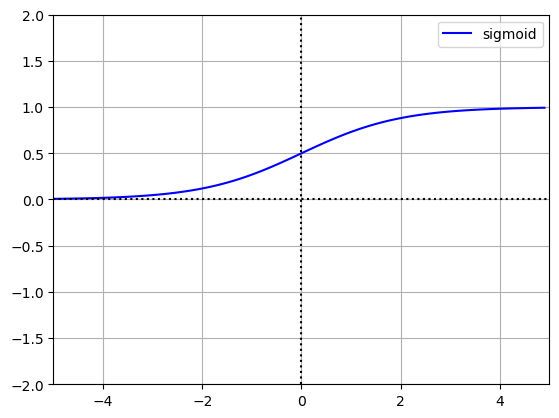

In [5]:
plot_sigmoid()

### Tanh

The math (for reference!):

$$
\bbox[5px,border:2px solid red]
{
\tanh(x)= \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} +1}
}
$$

What it does: 
- squishes everything between -1 and 1.

Think: *step function* (on/off switch) between -1 and 1.

In [6]:
def tanh(z):
    e = np.exp(2*z)
    return (e - 1)/(e + 1)

def plot_tanh():
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, tanh(x), 'b', label='tanh')
    plt.xlim([-5,5])
    plt.ylim([-2,2])
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')      
    plt.legend()
    plt.grid()
    plt.show()

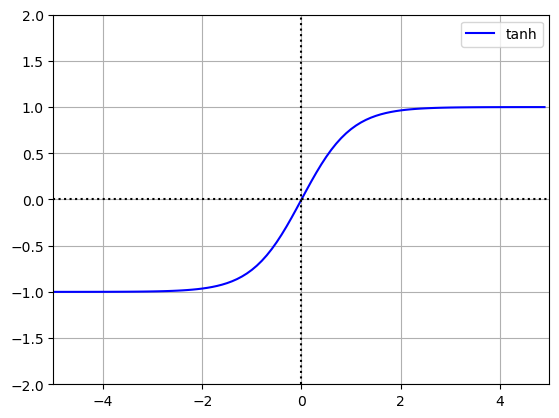

In [7]:
plot_tanh()

### ReLU

The math (for reference!):

$$
\bbox[5px,border:2px solid red]
{
 \text{relu}(x) = \max(0, x)
}
$$

What it does:
- projects the negative part on zero, leaves the positive part unchanged.

Think: a **radically simplified** *step-ish function* (on/off switch)?

In [2]:
def relu(z):
    return np.maximum(z, 0)

def plot_relu():
    import matplotlib.pyplot as plt
    x = np.arange(-2, 2, 0.1)
    plt.plot(x, relu(x), 'b', label='relu')
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')
    plt.legend()
    plt.grid()
    plt.show()

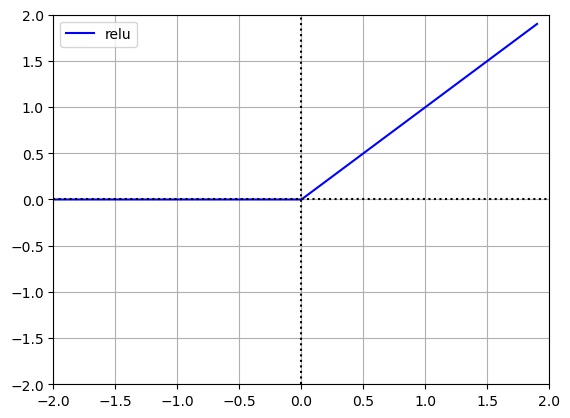

In [3]:
plot_relu()

As often happens in deep learning, there are a lot of variations, with the field constantly evolving. No need to to know all these by heart!

<!-- <img src="images/deep/activation-functions-stanford-cs231n.png" style="width: auto; height: 700px;"> -->
<img style="width: auto; height: 700px;" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/deep/activation-functions-stanford-cs231n.png?raw=true">

<small>[Stanford CS 231N, lecture 6 slides](http://cs231n.stanford.edu/2017/syllabus.html)</small>

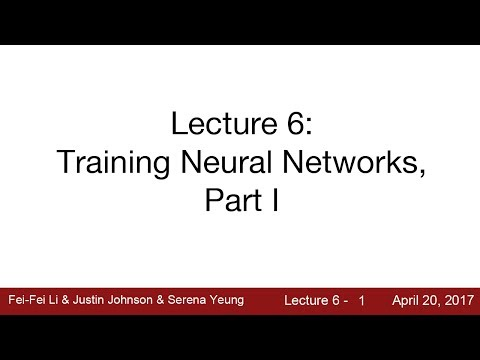

In [8]:
# A great in-depth overview of activation functions (and more)
YouTubeVideo('wEoyxE0GP2M', width=853, height=480, start=289) # Stanford cs231n Activation Functions

## Softmax

The math, (for reference!):

$$
\bbox[5px,border:2px solid red]
{
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_i e^{x_i}}
}
$$

What it does:
- make all numbers positive (through $e^x$);
- make big numbers *very* big (through $e^x$) → they will take all the probability mass;
- normalize → **all numbers between 0 and 1 and all sum to 1**  (divide by the total $ \sum_i e^{x_i}$).
  
Think: turn numbers into a probability distribution.

In [9]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def plot_softmax(x):
    plt.bar([str(x) for x in range(x.shape[0])], softmax(x))
    plt.ylim([0,1])
    plt.title("Softmax")
    plt.show()

##### Note

Because $e^x$ will make big numbers *very big*, the largest one will **overtake all the rest**.

**The larger the numbers, the closer _softmax_ resembles a normal max**.

Because there will always be a tiny bit of probability mass left on the rest, it is a **soft**max.

Also: smooth & differentiable. (✯◡✯)

In [2]:
nums = tf.random.uniform(shape=(10,))                   # ten random numbers

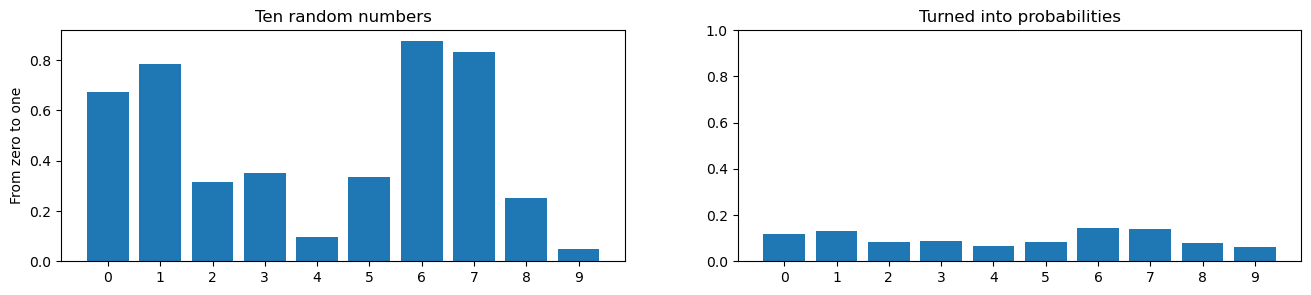

In [3]:
probs = tf.nn.softmax(nums)                             # turned into probabilities

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))
ax1.bar([str(x) for x in range(nums.shape[0])], nums)   # our ten numbers
ax1.set_title("Ten random numbers")
ax1.set_ylabel("From zero to one")
ax2.bar([str(x) for x in range(probs.shape[0])], probs) # the probabilities
ax2.set_title("Turned into probabilities")
ax2.set_ylim([0,1])
plt.show()

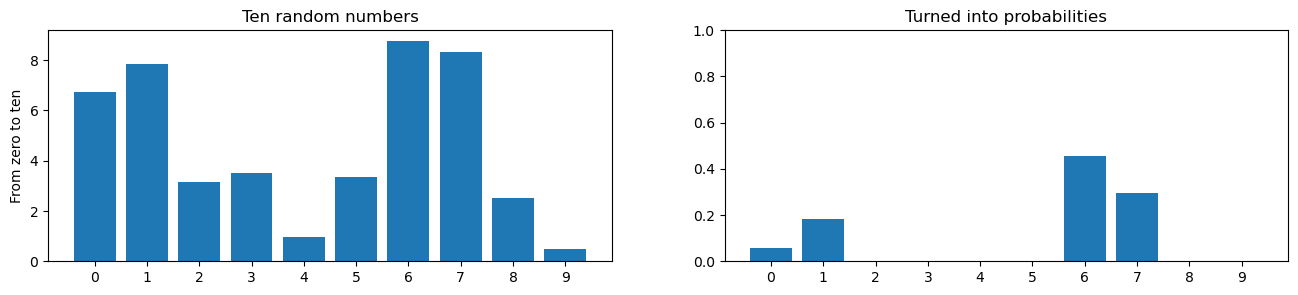

In [6]:
nums_ten = nums * 10                                          # the same ten random numbers * 10
probs = tf.nn.softmax(nums_ten)                               # turned into probabilities

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))
ax1.bar([str(x) for x in range(nums_ten.shape[0])], nums_ten) # our ten numbers
ax1.set_title("Ten random numbers")
ax1.set_ylabel("From zero to ten")
ax2.bar([str(x) for x in range(probs.shape[0])], probs)       # plot the probabilities
ax2.set_title("Turned into probabilities")
ax2.set_ylim([0,1])
plt.show()

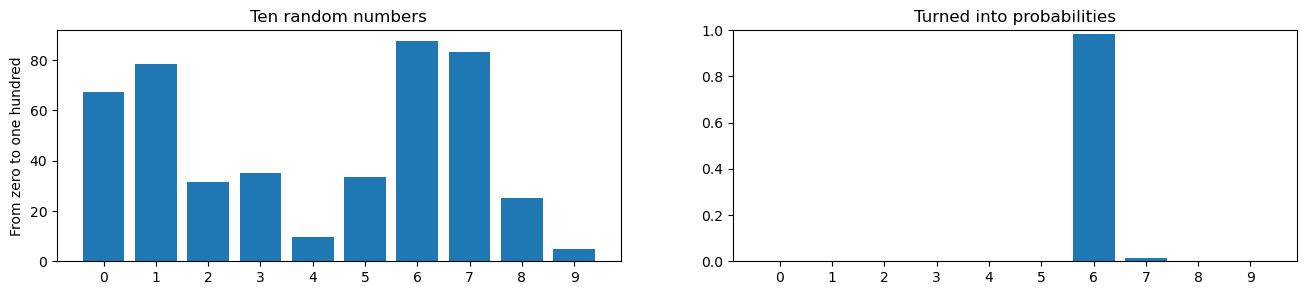

In [7]:
nums_hundred = nums * 100                                             # the same ten random numbers * 100
probs = tf.nn.softmax(nums_hundred)                                   # turned into probabilities

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))
ax1.bar([str(x) for x in range(nums_hundred.shape[0])], nums_hundred) # our ten numbers
ax1.set_title("Ten random numbers")
ax1.set_ylabel("From zero to one hundred")
ax2.bar([str(x) for x in range(probs.shape[0])], probs)               # plot the probabilities
ax2.set_title("Turned into probabilities")
ax2.set_ylim([0,1])
plt.show()

## Layers

$$
\bbox[5px,border:2px solid red]{
    \sigma(Wx + b) = a
}
$$

### Example with two inputs, one neuron

$$
\newcommand\mycolv[1]{\begin{bmatrix}#1\end{bmatrix}}
   \sigma\left( \mycolv{x_{1} & x_{2}}\mycolv{w_{11}\\ w_{12}}  + b_1 \right) = a_1
$$


<!-- <img style="" src="images/nn/nn.2.svg"> -->

<img style="float:left" src="https://raw.githubusercontent.com/jchwenger/AI/d942b064df6d0e929cbd027bc6a6939f9e8fc763/3-getting-started/images/nn/nn.2.svg">

### Example with two inputs, two neuron


We can do these two operations in one fell swoop using matrix multiplication.


\begin{eqnarray}
\sigma \left(
\begin{bmatrix} x_1  & x_2  \end{bmatrix}
\begin{bmatrix} w_{11} & w_{21} \\  w_{12} & w_{22} \end{bmatrix} 
+
\begin{bmatrix} b_1  & b_2 \end{bmatrix}
\right)
= \begin{bmatrix} a_1  & a_2 \end{bmatrix} 
\end{eqnarray}

<!-- <img style="" src="images/nn/nn.3.svg"> -->

<img style="float:left" src="https://raw.githubusercontent.com/jchwenger/AI/d942b064df6d0e929cbd027bc6a6939f9e8fc763/3-getting-started/images/nn/nn.3.svg">

### Example with two inputs, n neurons

\begin{eqnarray}
\sigma \left(
\begin{bmatrix} x_1  & x_2  \end{bmatrix}
\begin{bmatrix} w_{11} & \dots & w_{1n} \\ w_{12} & \dots & w_{2n} \end{bmatrix}
+
\begin{bmatrix} b_1 & \dots & b_n \end{bmatrix} 
\right) = 
\begin{bmatrix} a_1 & \dots & a_n \end{bmatrix} 
\end{eqnarray}


Example with 12 neurons:

<!-- <img style="" src="images/nn/nn.4.svg"> -->

<img style="float:left" src="https://raw.githubusercontent.com/jchwenger/AI/d942b064df6d0e929cbd027bc6a6939f9e8fc763/3-getting-started/images/nn/nn.4.svg">

### Note

Wouldn't it be nicer if things were just like in our original math equation?

$$\sigma(Wx + b) = a$$


Given how matrix multiplication works, you can do the **exact same operation** with your input $x$ being a column vector, and the rest of the dimensions transposed.

This time the weight matrix is on the *left* of the input vector...

\begin{eqnarray}
\sigma \left(
\begin{bmatrix} w_{11} & w_{12} \\ \vdots & \vdots \\  w_{n1} & w_{n2} \end{bmatrix}
\begin{bmatrix} x_1  \\ x_2  \end{bmatrix}
+
\begin{bmatrix} b_1 \\ \vdots \\ b_n \end{bmatrix} 
\right) &= 
\begin{bmatrix} a_1 \\ \vdots \\ a_n \end{bmatrix} 
\end{eqnarray}

The rule, (for reference!):

$$ (AB)^T = B^TA^T $$
([Wikipedia](https://en.wikipedia.org/wiki/Matrix_multiplication#Transpose))


---

## Code example

In [8]:
# a three unit layer
len_input = 2
n_units = 8                                        # example:
x = tf.random.normal(shape=(1,len_input))          # (1,2)
w = tf.random.normal(shape=(len_input,n_units))    # (2, 16)   | (1,2)·(2,16) → (1,16)
b = tf.random.normal(shape=(1,n_units))            # (1,16)

In [9]:
print(x.shape)
print(x.numpy())

(1, 2)
[[ 1.4537477 -0.8196129]]


In [10]:
print(w.shape)
print(w.numpy())

(2, 8)
[[ 0.53651404  0.5836423  -0.7242289   1.3810374   0.37941355 -1.2769159  -0.3684646  -0.0583751 ]
 [ 1.2998239   0.71954983  0.2874902  -0.10735157 -0.4353601   0.05451841 -1.3514175   0.568455  ]]


In [11]:
print(b.shape)
print(b.numpy())

(1, 8)
[[ 0.17335483  0.2446352   0.9415455   1.059299    1.3738545  -1.2257805   0.7099802   0.53480214]]


Now our affine transformation followed by `relu`.

In [12]:
y = x @ w         # now our input x has been *projected* into an 8-dimensional space
print(y.shape)
print(y.numpy())

(1, 8)
[[-0.28539634  0.25871632 -1.2884768   2.0956666   0.9083984  -1.9009976   0.5719847  -0.5507757 ]]


In [13]:
y += b
print(y.shape)
print(y.numpy())

(1, 8)
[[-0.1120415   0.5033515  -0.34693134  3.1549656   2.2822528  -3.1267781   1.2819649  -0.01597357]]


In [14]:
a = tf.nn.relu(y)
print(a.shape)
print(a.numpy())

(1, 8)
[[0.        0.5033515 0.        3.1549656 2.2822528 0.        1.2819649 0.       ]]


---

## Visualising transformations

Adapted from Yann LeCun and Alfredo Canziani's course  
[Deep Learning with PyTorch](https://atcold.github.io/pytorch-Deep-Learning/) at NYU ([lesson 02](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/02-space_stretching.ipynb)).

In [20]:
def set_default(figsize=(10, 10), dpi=100):
    return
    # plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes') #, facecolor='k')
    plt.rc('figure') #, facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

def show_scatterplot(X, colors, title='', xlim=None, ylim=None):
    plt.figure()
    plt.grid()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=5)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.title(title, fontdict={'fontsize':8})
    # plt.axis('off')
    
def plot_bases(bases, width=0.04):
    bases = bases.numpy()
    bases[2:] -= bases[:2]
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)    
    
set_default(figsize=(5,5))

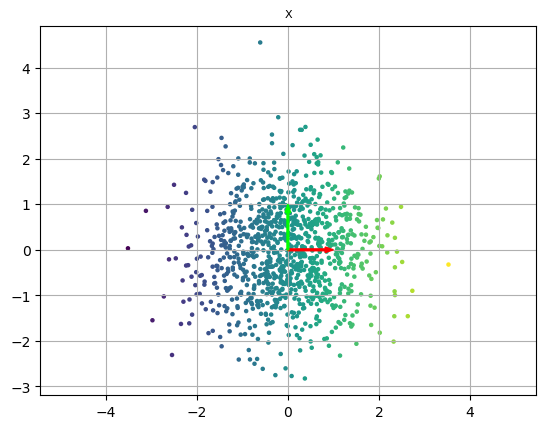

In [21]:
# generate some points in 2-D space
n_points = 1000
X = tf.random.normal(shape=(n_points, 2))
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = tf.concat((tf.zeros((2, 2)), tf.eye(2)), 0)
plot_bases(OI)

In [22]:
def viualize_layers(n_hidden=2, n_layer=2):
    activation = tf.nn.relu
    n_hidden = n_hidden
    n_layer = n_layer

    inp = tf.keras.Input(shape=(2,))               # our input
    x = inp
    layer_names = []
    activations = []
    for i in range(n_layer):
        if i < n_layer - 1:                        # for each layer
            x = tf.keras.layers.Dense(n_hidden)(x) # affine transformation
            layer_names.append(f"affine {i+1}")
            activations.append(x)
            x = activation(x)                      # then activation
            activations.append(x)
            layer_names.append(f"{activation.__name__} {i+1}")
        else:                                      # last layer:
            x = tf.keras.layers.Dense(n_hidden)(x) # affine transformation only!
            activations.append(x)
            layer_names.append(f"affine {i+1}")
    x = tf.nn.softmax(x)                           # softmax at the end
    layer_names.append(f"softmax")
    activations.append(x)                          

    model = tf.keras.Model(inp, activations)       # functional syntax: I tel my model what is my input, and what is my output
    model.compile()                                # notice that I pass the whole list of activations, so that my model
    Ys = model(X)                                  # will return all the intermediate values!

    show_scatterplot(X, colors, title='x')
    for i, (l, Y) in enumerate(zip(layer_names, Ys)):
        show_scatterplot(Y, colors, title=f'relu | {l}')

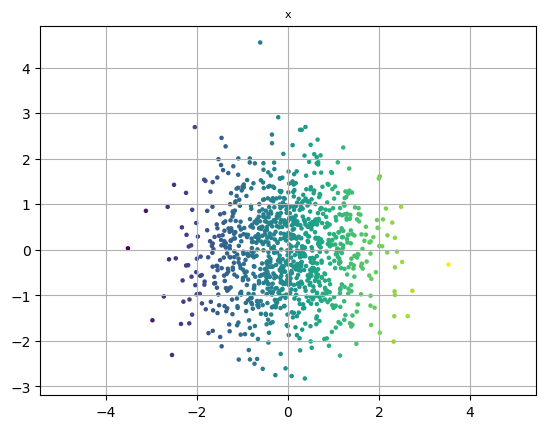

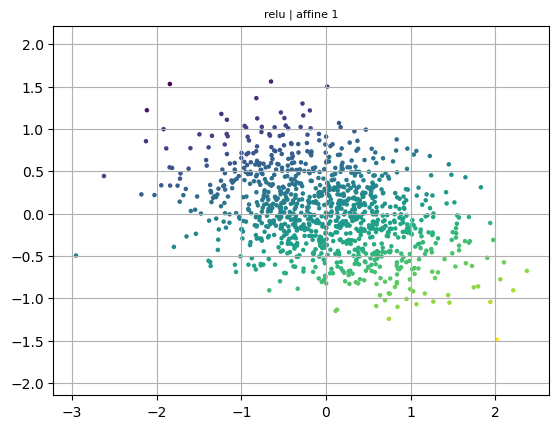

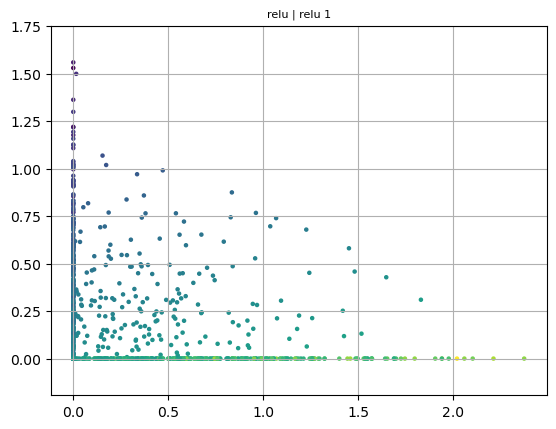

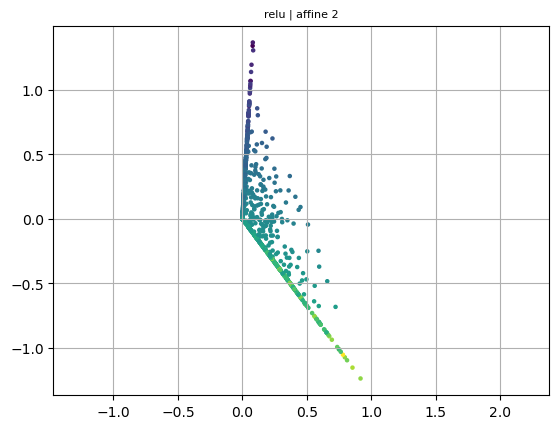

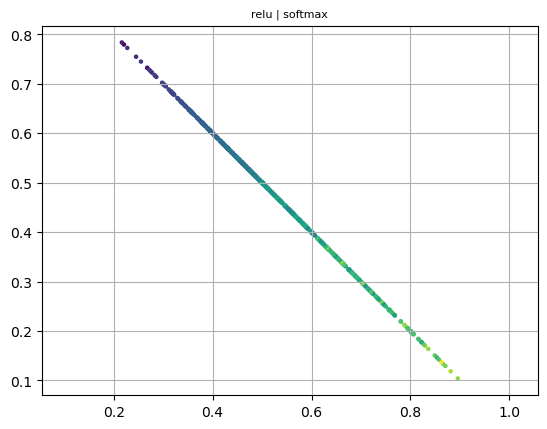

In [23]:
viualize_layers() # this function creates a network and extracts intermediate transformations

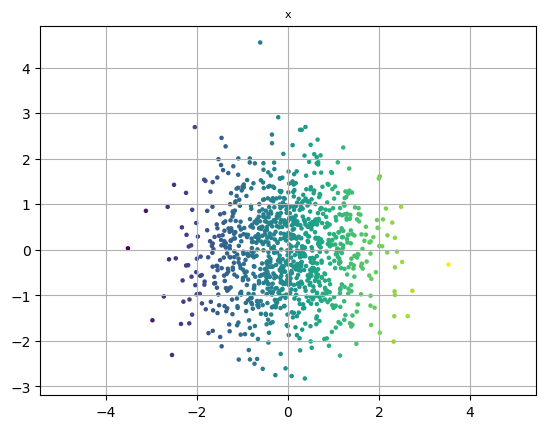

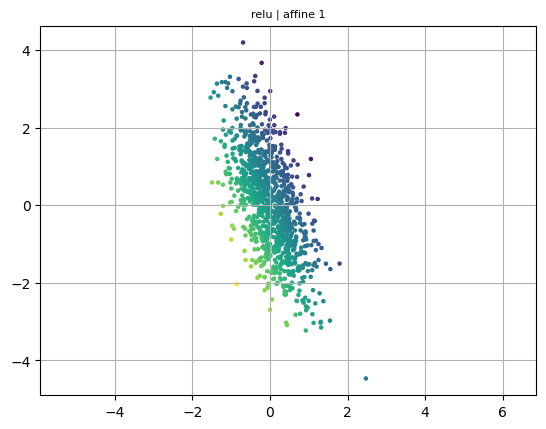

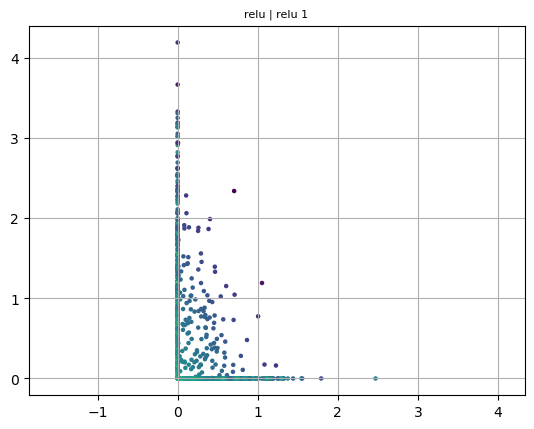

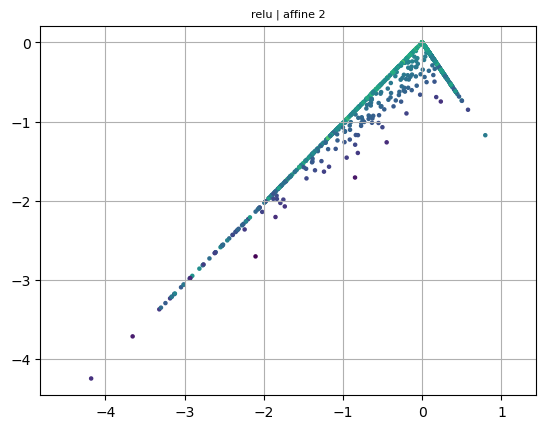

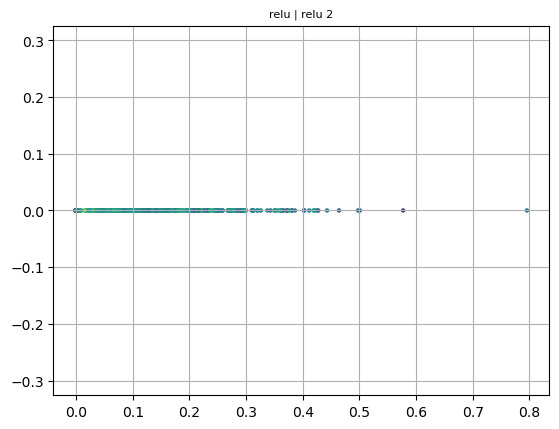

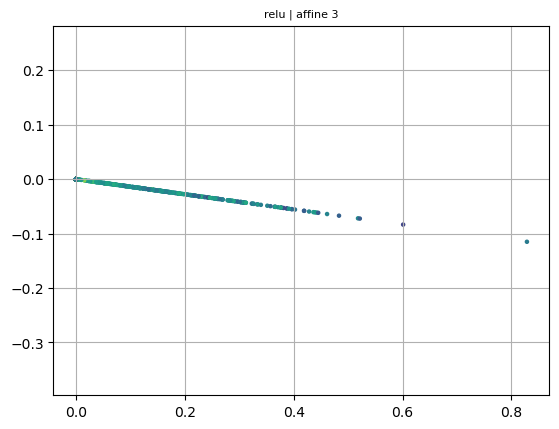

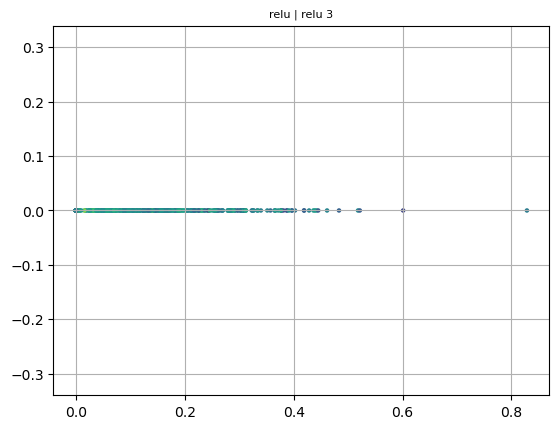

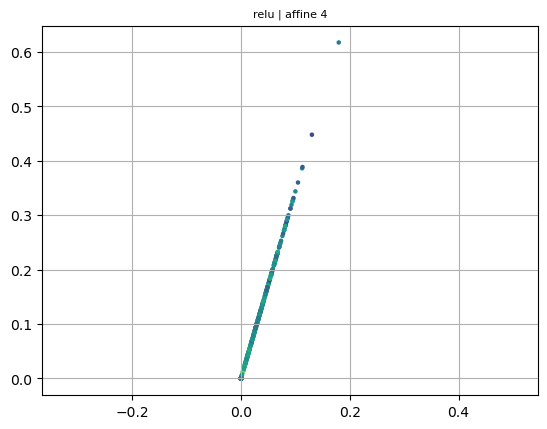

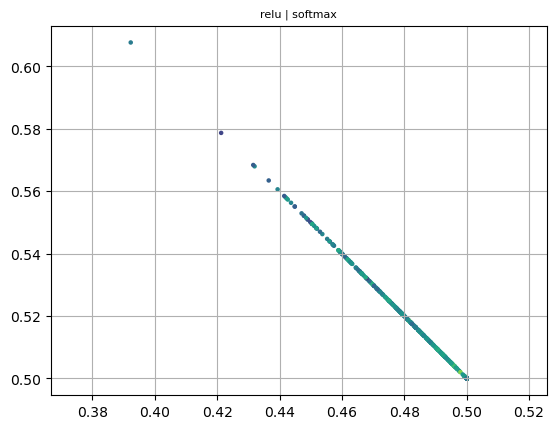

In [36]:
viualize_layers(n_layer=4)

---

## Loss

The math (for reference): 

$$ 
\bbox[5px,border:2px solid red]
{
\DeclareMathOperator*{\argmax}{argmax} % thin space, limits underneath in displays
J(\theta) = \frac{1}{m}\sum_{i=1}^m Loss(f(x^i;\theta),y^i)
}
$$

$$J = loss, f = model, \theta = parameters, x = sample, y = label$$


How well our model is doing. 

Discrepancy between our predictions and our targets.

The loss is defined **over the entire dataset** (how well we do **on average**).

## Categorical cross entropy

<!-- <img style="height:250px" src="images/ml/cross-entropy.png"> -->
<img src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/ml/cross-entropy.png?raw=true">

<small>[What is cross-entropy, Stack Overflow](https://stackoverflow.com/a/41990932)</small>

For **all** categories except the right one, the terms of this sum will be zero.

Since `true_class` is 1, we are left only with: 

$$
\bbox[5px,border:2px solid red]
{
- p(\text{true class})\ log{(\text{prediction})} \to - log{(\text{prediction})} 
}
$$

In [42]:
def plot_minus_log(figsize=(10,8)):
    points = tf.linspace(.001, 1, 100) # a hundred points between .001 and 1
    matplotlib.rcParams.update({'font.size': plt_fontsize * 1.5})
    f = plt.figure(figsize=figsize)
    plt.xlim([-.1,1.1])
    plt.plot(points, - tf.math.log(points), label="- log(x)")
    plt.text(0.05, 6, "← we are very WRONG: prediction")
    plt.text(0.05, 5.5, "is almost 0 but the truth is 1...")
    plt.text(0.05, 5, "BIG loss!")
    plt.text(.52, 1.5, "we are super RIGHT: prediction")
    plt.text(.52, 1, "is almost 1 and the truth is 1...")
    plt.text(.8, .5, "SMALL loss ↓")
    plt.xlabel("Prediction: from 0 to 1")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    matplotlib.rcParams.update({'font.size': plt_fontsize})

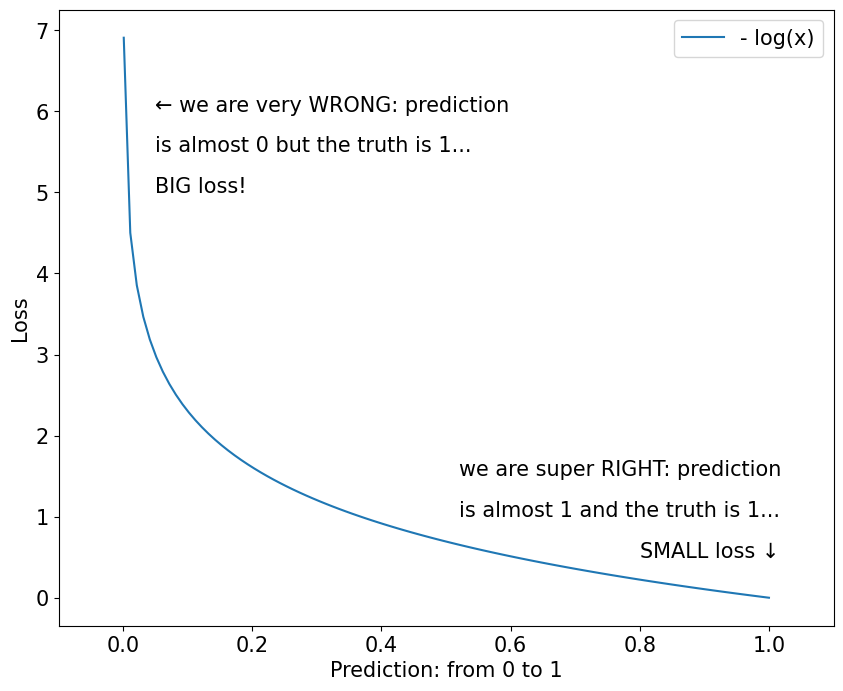

In [43]:
plot_minus_log()

---

## Stochastic Gradient Descent

The **input space** of our loss function (our parameters) is like a **landscape**.

We want to find mimima = **the lost points** in this landscape.

Too complicated to calculate: We iterate step by step.

<!-- <img style="height: 350px;float:right;" src="images/ml/loss.landscape.jpeg"> -->

<img style="height: 350px;float:right;" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/ml/loss.landscape.jpeg?raw=true">

<small style="position:absolute;bottom:0;right:0">A. Amini et al. “[Spatial Uncertainty Sampling for End-to-End Control](https://arxiv.org/abs/1805.04829)”. *NeurIPS Bayesian Deep Learning 2018*</small>

---

## Gradient

Allows us to know precisely **what influence** each of our parameters has on our loss.

The **negative gradient** gives us the direction of **steepest descent**.

How to change our parameters to make our loss change the most (locally).

---

## Backpropagation

Allows us to calculate the gradient our loss function: the influence of each parameter on our loss.

---

## Learning rate

If the **gradient** tells us 'where to go' in the loss landscape (our compass),

we need to know **by how much we move**:

that's the **learning rate** (aka **step size**).

### Learning rate

- `1e-4` (Chollet)
-  `3e-4` (many others)

##### Beware!
- Too small: too slow;
- Too big: we bounce around, danger of divergence!

Keras has sound default settings built-in!

---

## Optimizers

Optimizers automate the updating of our parameters. Here are the most common:

1. `Adam` (frankly, the most popular out there)
2. `RMSProp` (Chollet's fav?)
3. `SGD with momentum`(less costly, but tricky)

### Recommended playground

<!-- [!["Why Momentum Really Works", by Gabriel Oh, on Distill](images/gabriel-oh-momentum.png)](https://distill.pub/2017/momentum/) -->
<a href="https://distill.pub/2017/momentum/"><img src="https://drive.google.com/uc?id=1ncJChn84J9xPupLobO7MRymiGupGxXtG"></a>

Real life problem: we train networks **without such simple visualisations**.




In the above picture:
- the contour lines (altitude) are the loss we get at a particular point;
- the distance between each orange dot is determined by the step size;
- the direction of each orange line is determined by:
  - the gradient, but also,
  - the 'history of the gradient' (aka momentum: the ball on a slope analogy).
    With more momentum, you tend to move **more along the 'terrain'** (inside the 'ravine' of that example, rather than outside it).

## Batch size

Our loss ideally should be calculated **on our whole dataset**. Too expensive!

Instead, we can approximate it by computing it on a **subset** (a mini-batch), much quicker.

Also less noisy than a single sample!

Bigger batch size:  
- more precise gradient;  
- more expensive;
- try a bigger learning rate (= step size)!

In [ ]:
# always recommended!
YouTubeVideo('Ilg3gGewQ5U', width=853, height=480, start=187) # 3Blue1Brown 3, until 12'30 

---

# Coursework

Same instructions for undergrad/grad.

[Learn.gold link](https://learn.gold.ac.uk/mod/assign/view.php?id=1345509)

#### Note

DLWP **2nd edition**, email me or mz TA if you can't find it.

(The first edition has almost the same material, but a lot of the code has changed!)

Follow the universal workflow of DLWP 6.1-2 for a dataset of your choice. You can use the tensorflow datasets, MNIST, Reuters, IMDB and Boston Housing Price, or an external dataset. Work exclusively in a Jupyter notebook.

Universal workflow just before reading week.

- Lab 1: Jupyter + tensor basics
- Lab 2: MNIST
- Lab 3: Reuters
- Lab 4: IMDB
- Lab 5: Boston/California Housing

You can only use DLWP Part 1 layers (Chapters 1-6), that is:  
restrict your models to **sequential Dense** and **Dropout layers** (next week!).

You must tune/tweak at least **two hyperparameters**  
(= any parameter that is not **learnt**: learning rate, momentum, number of layers, etc.).

Your Jupyter notebook should read as a report - NOT just a sequence of code cells.

Structure your report with markdown headings, subheadings, tables etc. 

Your report should include the following sections:

- Introduction
- Methodology
- Results
- Conclusions

Credit will be awarded for (up to 70 marks):

- Report structure and quality as a document (avoid excessive repetition)
- Adherence to the DL workflow
- A systematic investigation
- Interpretation of results

Extra credit may be given for (up to 30 marks):

- Clean, modular code (function encapsulation)
- A dataset other than the ones mentioned above
- Demonstrable understanding of DLWP part 1 (Chapters 1-6) concepts

You can use as much DLWP code and code from these notebooks as you wish but **you must reference all code that is not original**.

Just submit the .ipynb file, or a zip file with the .ipynb file and any other files you might need, for instance images, but don't upload a dataset!

#### Note

No need to tweak the design/layout of the notebook!
- **Don't** center your text, for instance!
- Beware that if you change the css to have white text on a dark background, *if we open it with a light theme we see nothing*!